<a href="https://colab.research.google.com/github/maridufo/momentos_evaluativos/blob/main/ME03_G08_Data_proccesing_%26_met.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***1. Librerias y configuraciones previas:***

In [39]:
!pip install upsetplot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
!pip install pyjanitor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
!pip install empiricaldist

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
# Tratamiento de datos
#=====================================================================================================
import pandas as pd
import numpy as np

# Graficas
#====================================================================================================
import missingno
import upsetplot
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de datos
#====================================================================================================
import janitor


#Analisis de distribuciones y estadistico
#======================================================================================================
import empiricaldist
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

#Normalizaicón de datos y construcción del modelo
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Escalar variables
#================================================================================================
from sklearn.preprocessing import MinMaxScaler


#Separar los datos entrenamiento y prueba
#==============================================================================================0
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ***2. Cargar Data set:***



Este Dataset extraido de sap contiene los recibos manulaes tanto notad debido como crédito que se realizaron en 2023.


Acontinuación una breve descripción de las variables:



***Numero_Poliza:*** Es el núemro de poliza al cual corresponde el recibo manual.

***Codigo_Ramo_Op:*** Es le código de ramo al cual pertenece la poliza (producto)

***Num_Recibo:*** número asignado al recibo manual.

***Fecha_Emision:*** fecha de emisión del recibo manual.

***Fecha_Movimiento:*** Fecha en la cual se realizó el movimiento.

***Fecha de cobro:*** fecha en la cual se hará efectivo el cobro.

***Cod_Sucursal:*** Código de la sucursual donde se realizó el recibo.

***Cod_Agente:*** Código del agente que solicitó el recibo.

***Estado_Contrato_Cd:*** Número de adignación al estado del contrato.

***Estado_Contrato_Desc:*** Estado en el cual se encuentra la poliza.

***Nombre_Regional:*** Nombre de la regional.

***Nombre_Canal_Comercial:*** Canal comercial que solicitó el recibo.

***estado_rec:*** Estado del recibo.

***Tipo_Oper_Pago_Cd:*** Número asigando por Sap a la operación

***Desc_Causa_Estado*** Justificación del recibo manual.

***Valor_Cobro:*** Valor del recibo del cobro.

***Desc_Operacion_Pago:*** Descripción de la operación.












In [98]:
# Cargar el dataset.

url = 'https://raw.githubusercontent.com/maridufo/momentos_evaluativos/main/recibos2023_prep.csv?token=GHSAT0AAAAAACQAGTZFT6OWY3FG7VAEDL2QZSGDQ5Q'
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Numero_Poliza,Codigo_Ramo_Op,Num_Recibo,Fecha_Emision,Fecha_Movimiento,Fecha_Cobro,Cod_Sucursal,Cod_Agente,Estado_Contrato_Cd,Estado_Contrato_Desc,Nombre_Regional,Nombre_Canal_Comercial,estado_rec,Tipo_Oper_Pago_Cd,Desc_Causa_Estado,Valor_Cobro,Desc_Operacion_Pago
0,083004630277,083,99695333,2023/11/23,NaN,2024/01/09,2626,51850,4,Vigente,REGIONAL NORTE,PROMOTORAS,Legalizado,"1,764",Renovado,"396,266,766.0000",OPERACION DE PAGO
1,114100038891,114,10978560,2023/05/30,NaN,NaN,2815,10206,4,Vigente,REGIONAL ANTIOQUIA,CORREDORES,Legalizado,-1,Renovado,"57,429.0000",Sin informaciÃ³n
2,090001087156,090,67908022,2023/03/08,NaN,2023/03/08,2514,12870,2,Cancelado,REGIONAL CENTRO,SUCURSALES,Legalizado,"1,764",CANCELACION POR NO PAGO,"1,389,312.0000",OPERACION DE PAGO
3,013300033767,013,13843585,2023/05/26,NaN,NaN,8010,30083,2,Cancelado,Sin InformaciÃ³n,Sin InformaciÃ³n,Legalizado,-1,CANC. POR PETICION DEL CLIENTE,54.6000,Sin informaciÃ³n
4,081000632939,081,58352078,2023/12/26,2024/02/20,NaN,4034,2093,4,Vigente,REGIONAL ANTIOQUIA,SUCURSALES,Legalizado,30,Renovado,"5,750,904.0000",ANULACION DE MODIFICACION VALORABLE CON COBRO ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36098 entries, 0 to 36097
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Numero_Poliza           36098 non-null  object
 1   Codigo_Ramo_Op          36098 non-null  object
 2   Num_Recibo              36098 non-null  int64 
 3   Fecha_Emision           36098 non-null  object
 4   Fecha_Movimiento        1910 non-null   object
 5   Fecha_Cobro             29724 non-null  object
 6   Cod_Sucursal            36098 non-null  int64 
 7   Cod_Agente              36098 non-null  int64 
 8   Estado_Contrato_Cd      36098 non-null  int64 
 9   Estado_Contrato_Desc    36098 non-null  object
 10  Nombre_Regional         36098 non-null  object
 11  Nombre_Canal_Comercial  36098 non-null  object
 12  estado_rec              36098 non-null  object
 13  Tipo_Oper_Pago_Cd       36098 non-null  object
 14  Desc_Causa_Estado       36098 non-null  object
 15  Va

In [ ]:
# Tamaño del Dataset
df.shape

(36098, 17)

In [ ]:
# Número de datos
df.size

613666

## ***3. Valores faltantes:***

In [ ]:
#En el dataset algunos campos sin informaión estan como 'Sin informaciÃ³n' y 'NaN' no reconocidos como nulos, se realizará el cambio para que aparezcan como NaN y se puedan reconocer facilmente.

df.replace({'Sin informaciÃ³n': np.nan,'NaN': np.nan}, inplace = True)

### ***3.1 Crear una nueva clase para  Extender pandas y acceso a funciones para tratamiento de faltantes:***

In [ ]:

# Decorador para definir como se accede a los metodos de la clase, con el acceso 'missing'.

@pd.api.extensions.register_dataframe_accessor('missing')

class MissingMethod: # Nombrar la clase

  def __init__(self, pandas_obj): #se incluye parametro 'pandas_obj'

    self._df  = pandas_obj # Guardar este objeto en una variable interna para la clase.

# Añadir métodos

  def number_missing(self):
    """
    Identifica el núemro de valores nulos

    """

    return self._df.isna().sum().sum() #Isna arroja una tabal de booleanos, los sumamos por cada una de las variables, y lo volvemos a sumar paar ver el total en el DataFrame.

  def number_complet(self):
    """
    Identifica los valores completos, que no son nulos.

    """
    return self._df.size - self._df.missing.number_missing()

  def missing_variable_summary(self):
    """
    Tabla con faltantes por columna.

     Esta función calcula un resumen de los valores faltantes por columna en un DataFrame.

    """
    return self._df.isnull().pipe(  # pasar el  DatFrame resultante de self._df.isnull() a una función lambda
         lambda df_1:(
          df_1.sum()                #calcula la suma de los valores True en cada columna
          .reset_index(name = 'num_faltantes')  # resetea el índice del DataFrame y renombra la columna resultante como 'num_faltantes
          .rename(columns = {'index':'variable'}) #renombra la columna del índice como 'variable'.
          .assign(                                 # agrega nuevas columnas al DataFrame resultante.
              num_Datos = len(df_1),
              porc_faltantes = lambda df_2:df_2.num_faltantes/len(df_1)* 100 #calcula el porcentaje de valores faltantes por columna (df_2.n_missing / df.num_faltantes * 100) y lo asigna a la columna 'porc_faltantes'
          )
      )
    )

  def missing_variable_span(self, variable: str, span_every:str):
    """
    Esta función agrupa por intervalos de la columna fecha de emisión y calcula las estadisticas de variables faltantes en cada intervalo.

    """
    self._df['Fecha_Emision'] = pd.to_datetime(self._df['Fecha_Emision'], errors = 'coerce')# Convertir la columna de fecha a tipo datetime
    span_intervals = pd.interval_range(start=self._df['Fecha_Emision'].min(), end=self._df['Fecha_Emision'].max(), freq=span_every) # Generar los intervalos de fecha
    self._df['span'] = pd.cut(self._df['Fecha_Emision'], bins=span_intervals)   # Asignar a cada fila el intervalo al que pertenece
    return (
        self._df.groupby('span')
        .agg(
            n_in_span=(variable, 'size'),
            n_missing=(variable, lambda s: s.isnull().sum())
        )
        .assign(
            n_complete=lambda df: df.n_in_span - df.n_missing,
            pct_missing=lambda df: df.n_missing / df.n_in_span * 100,
            pct_complete=lambda df: 100 - df.pct_missing
        )
        .drop(columns=['n_in_span'])
        .reset_index()
    )

  def missing_upsetplot(self, variables : list[list] = None, **kwargs):
    """
    Genera un gráfico UpSet para visualizar la intersección de valores faltantes entre diferentes variables en un DataFrame.
    Args:
        variables (list[str], optional): Una lista de variables (columnas del DataFrame) que se utilizarán para generar el gráfico UpSet.
                                          Si no se proporciona, se utilizarán todas las columnas del DataFrame. Default: None.
        **kwargs: Argumentos adicionales que se pueden pasar a la función upsetplot.plot para personalizar el gráfico

    """
    if variables is None:
        variables = self._df.columns.tolist()

    return (
        self._df.isna()
        .value_counts(variables)
        .pipe(lambda df: upsetplot.plot(df, **kwargs))
    )




<ipython-input-64-632019a1499b>:5: UserWarning: registration of accessor <class '__main__.MissingMethod'> under name 'missing' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class MissingMethod: # Nombrar la clase


### ***3.2 Cantidad de valores faltantes en el DatFrame:***

In [ ]:
# Cuantos valores faltantes hay en el DatFrame
df.missing.number_missing() #Arroja el número de faltantes en mi Dataset

47376

### ***3.2 Cantidad de valores completos en el DatFrame:***

In [ ]:
# Cuantos valores completos hay en el DataFrame
df.missing.number_complet()

566290

### ***3.3 Porporción de faltantes por columnas:***

In [ ]:
# Porporción de faltantes por columnas
df.missing.missing_variable_summary()

,variable,num_faltantes,num_filas,porc_faltantes
0,Numero_Poliza,0,36098,0.000000
1,Codigo_Ramo_Op,0,36098,0.000000
2,Num_Recibo,0,36098,0.000000
3,Fecha_Emision,0,36098,0.000000
4,Fecha_Movimiento,34188,36098,94.708848
5,Fecha_Cobro,6374,36098,17.657488
6,Cod_Sucursal,0,36098,0.000000
7,Cod_Agente,0,36098,0.000000
8,Estado_Contrato_Cd,0,36098,0.000000
9,Estado_Contrato_Desc,0,36098,0.000000


### ***3.4 Identificar concentración de valores faltantes en columna relevantes 'descripción de la operacion de pago' por fecha:***


In [ ]:
df.missing.missing_variable_span(variable= 'Desc_Operacion_Pago', span_every = '1M')

,span,n_missing,n_complete,pct_missing,pct_complete
0,"(2023-01-31, 2023-02-28]",247,2441,9.188988,90.811012
1,"(2023-02-28, 2023-03-31]",359,2497,12.570028,87.429972
2,"(2023-03-31, 2023-04-30]",392,2195,15.152687,84.847313
3,"(2023-04-30, 2023-05-31]",644,2846,18.452722,81.547278
4,"(2023-05-31, 2023-06-30]",455,2672,14.550688,85.449312
5,"(2023-06-30, 2023-07-31]",354,2843,11.072881,88.927119
6,"(2023-07-31, 2023-08-31]",279,2687,9.406608,90.593392
7,"(2023-08-31, 2023-09-30]",320,2909,9.910189,90.089811
8,"(2023-09-30, 2023-10-31]",528,2678,16.469120,83.530880
9,"(2023-10-31, 2023-11-30]",320,2567,11.084170,88.915830


### ***3.5 Representación gráfica valores faltantes por cada variable:***

<Axes: >

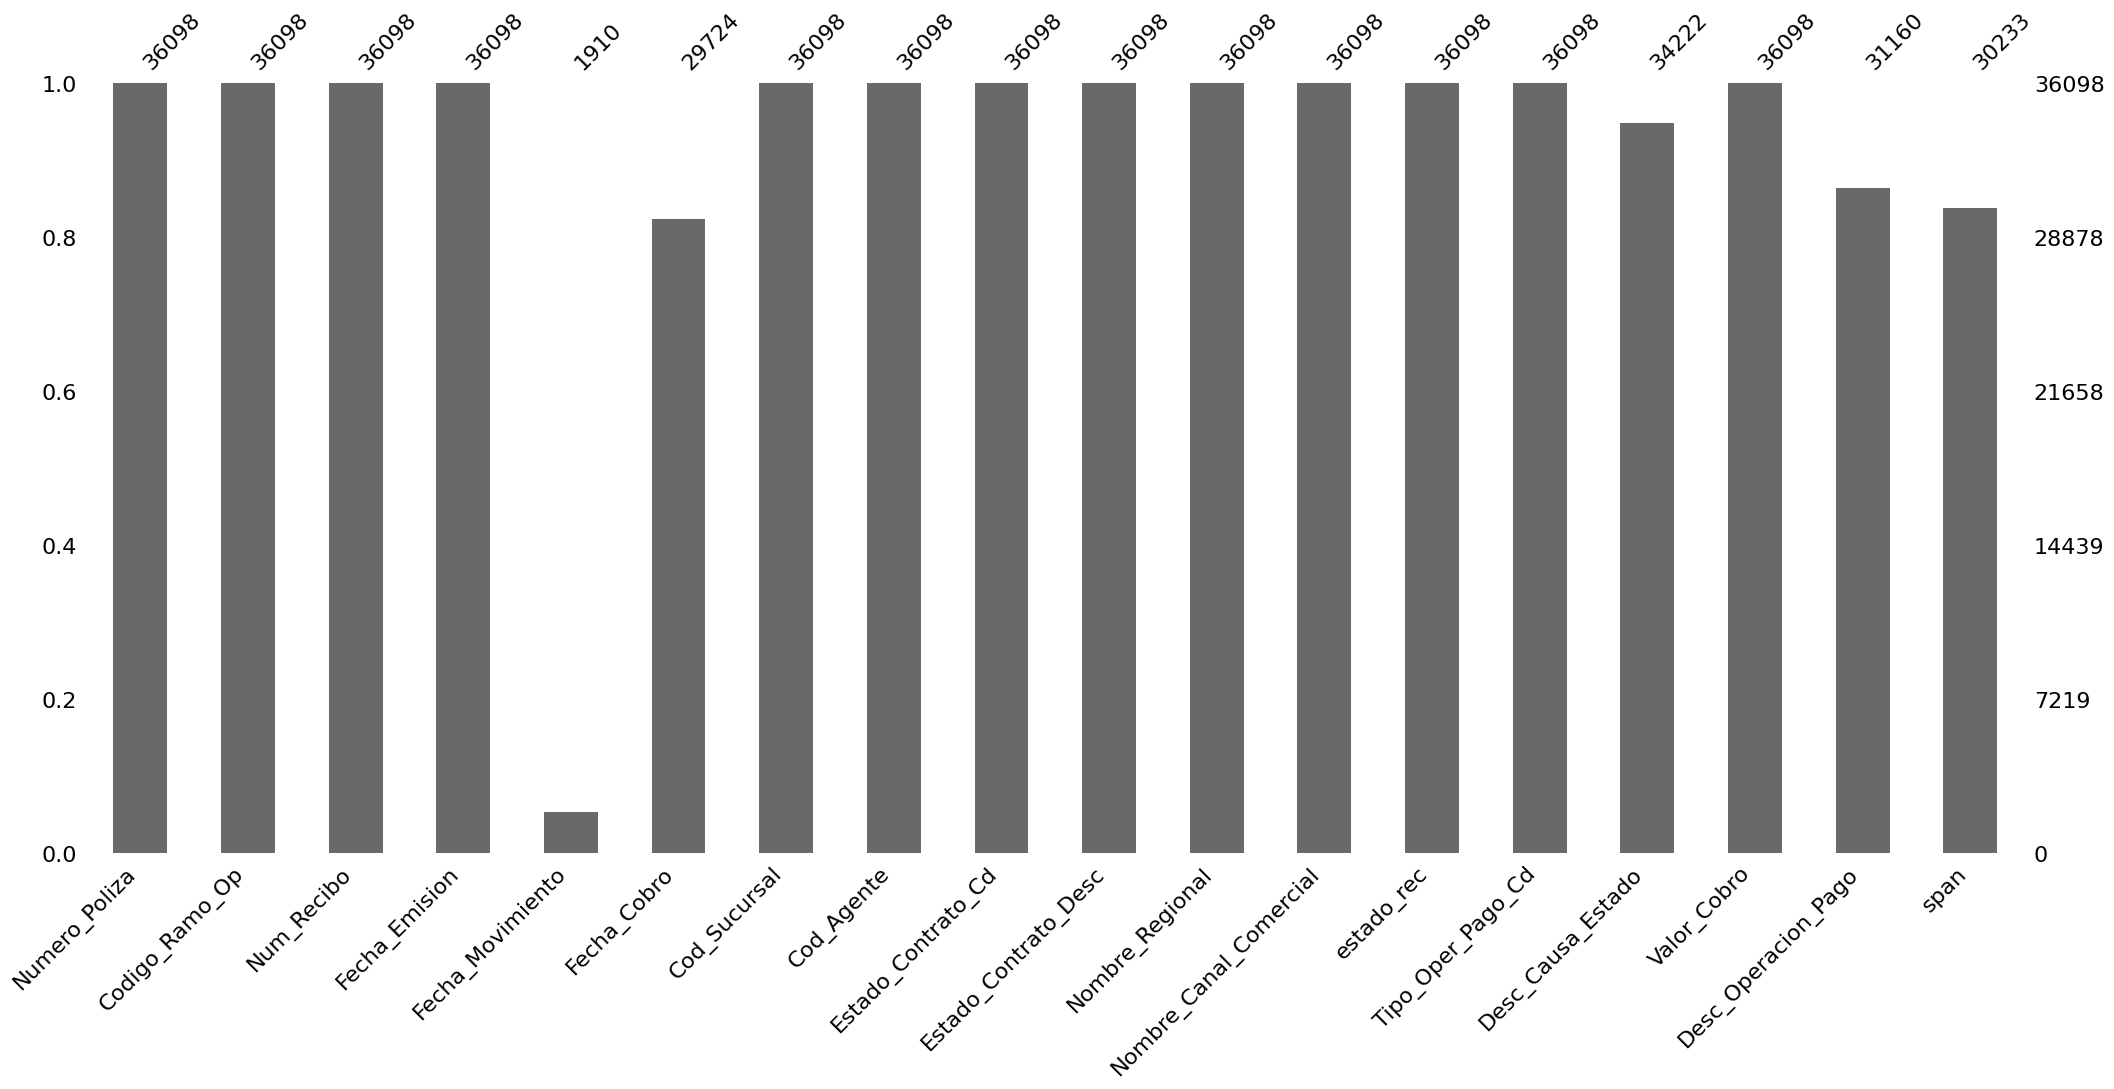

In [ ]:
missingno.bar(df = df)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

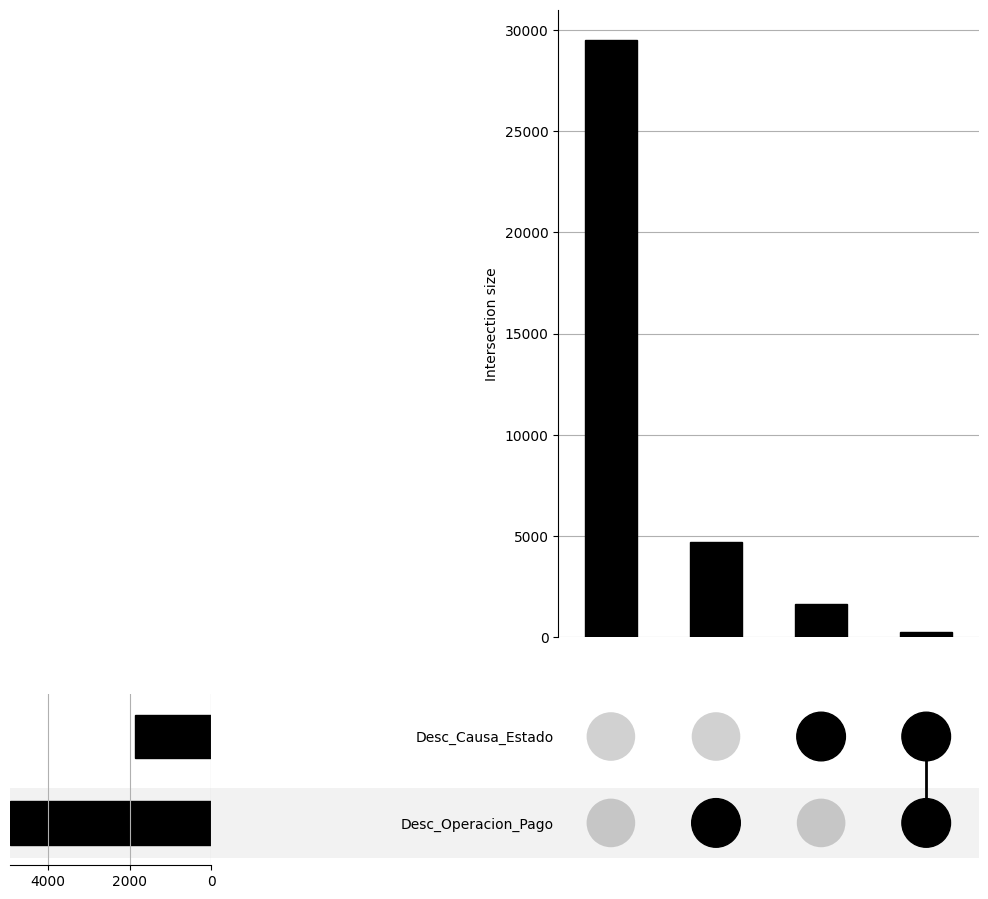

In [ ]:
df.missing.missing_upsetplot( variables = ['Desc_Operacion_Pago', 'Desc_Causa_Estado'],
                              element_size = 100)

## ***4. Depuración inicial de Base de Datos:***

Se borran las siguientes columnas debido a que no aportan información al modelo que se desea desarrollar:

In [99]:
df = df.drop(['Fecha_Movimiento','Num_Recibo', 'Cod_Sucursal', 'Cod_Agente', 'Estado_Contrato_Cd', 'Nombre_Canal_Comercial', 'estado_rec', 'Tipo_Oper_Pago_Cd', 'Numero_Poliza','Fecha_Cobro' ,'Fecha_Emision'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Debido a que las columnas que voy a usar no tienen campos nulos no se deben borrar datos, es posible que en el desarrollo de la actividad se use alguna variable relacionada con la fecha de emisión (como el mes, por ejemplo), si es el caso se procederá a borrar las filas sin dicha información. Por otra parte, en esta primera limpieza de datos se trabajará con la categoría “sin información” que se presenta en algunas columnas como “Desc_Operacion_Pago” y “Desc_Causa_Estado”, debido a que esta información puede servir al modelo, una vez realizado el primer modelo y de ser necesario se puede plantear borrar dichas filas.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36098 entries, 0 to 36097
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Codigo_Ramo_Op        36098 non-null  object 
 1   Fecha_Emision         36098 non-null  object 
 2   Estado_Contrato_Desc  36098 non-null  object 
 3   Nombre_Regional       36098 non-null  object 
 4   Desc_Causa_Estado     36098 non-null  object 
 5   Valor_Cobro           36098 non-null  float64
 6   Desc_Operacion_Pago   36098 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.9+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Para facilitar las siguientes transformaciones, se cambia el tipo de todas las columnas a Str, a excepción de "valor_cobro

In [100]:
colscat = df.columns[df.columns != 'Valor_Cobro']
df[colscat] = df[colscat].apply(lambda x: x.str.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### ***5 Arreglo de textos de la BD***

Reemplazamos Sin informaciÃ³n por sin informacion, y las demás palabras que puedan dificultar el trabajo con la BD


In [101]:
df['Desc_Operacion_Pago'] = df['Desc_Operacion_Pago'].str.replace('Sin informaciÃ³n', 'sin informacion')
df['Nombre_Regional'] = df['Nombre_Regional'].str.replace('Sin InformaciÃ³n', 'sin informacion')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('Sin informaciÃ³n', 'sin informacion')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('ORDEN DE LA COMAÃ‘IA - NO POS', 'Orden de la compania')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('PÃ“LIZA VENCIDA', 'Poliza vencida')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('Por peticiÃ³n del cliente', 'Por petición del cliente')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('CANC. POR LICITACIÃ“N DESIERTA', 'CANC. POR LICITACIO“N DESIERTA')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('Por orden de la compaÃ±Ã­a', 'Por orden de la compañia')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('RehabilitaciÃ³n', 'Rehabilitacion')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('PrÃ³rroga', 'Prorroga')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('Por error de trÃ¡mite', 'Por error de tramite')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('Sin informaciÃ³n', 'Sin informacion')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('CANC. POR CESIÃ“N DE CONTRATO', 'CANC. POR CESION DE CONTRATO')
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].str.replace('POR ERROR EN EXPEDICIÃ“N', 'POR ERROR EN EXPEDICION')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### ***7 Reducción de dimensionalidad y análisis previo de columnas.***

Para la columna "Codigo_Ramo_Op" Agrupamos las categorías de la siguiente manera Nota: Nota: El texto al que refiere cada código se tomó de SAP
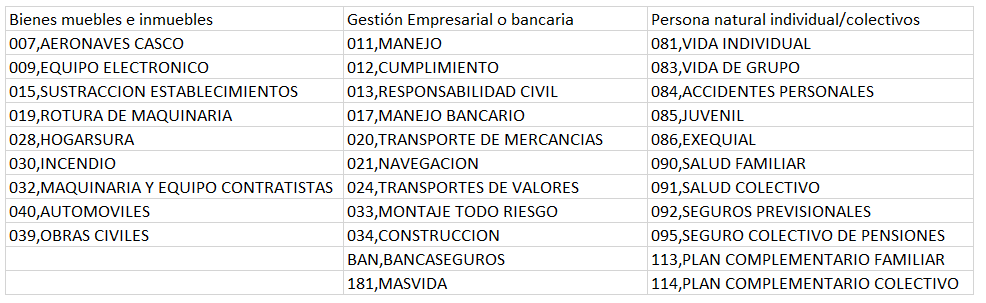


In [102]:
df['Codigo_Ramo_Op'] = df['Codigo_Ramo_Op'].replace({
    '007': 'Bienes muebles e inmuebles',
    '009': 'Bienes muebles e inmuebles',
    '015': 'Bienes muebles e inmuebles',
    '019': 'Bienes muebles e inmuebles',
    '028': 'Bienes muebles e inmuebles',
    '030': 'Bienes muebles e inmuebles',
    '032': 'Bienes muebles e inmuebles',
    '040': 'Bienes muebles e inmuebles',
    '039': 'Bienes muebles e inmuebles',
    '011': 'Gestión empresarial o bancaria',
    '012': 'Gestión empresarial o bancaria',
    '013': 'Gestión empresarial o bancaria',
    '017': 'Gestión empresarial o bancaria',
    '020': 'Gestión empresarial o bancaria',
    '021': 'Gestión empresarial o bancaria',
    '024': 'Gestión empresarial o bancaria',
    '033': 'Gestión empresarial o bancaria',
    '034': 'Gestión empresarial o bancaria',
    'BAN': 'Gestión empresarial o bancaria',
    '181': 'Gestión empresarial o bancaria',
    '081': 'Persona natural individual o colectivo',
    '083': 'Persona natural individual o colectivo',
    '084': 'Persona natural individual o colectivo',
    '085': 'Persona natural individual o colectivo',
    '086': 'Persona natural individual o colectivo',
    '090': 'Persona natural individual o colectivo',
    '091': 'Persona natural individual o colectivo',
    '092': 'Persona natural individual o colectivo',
    '095': 'Persona natural individual o colectivo',
    '113': 'Persona natural individual o colectivo',
    '114': 'Persona natural individual o colectivo'
})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Codigo_Ramo_Op,Fecha_Emision,Estado_Contrato_Desc,Nombre_Regional,Desc_Causa_Estado,Valor_Cobro,Desc_Operacion_Pago
0,Persona natural individual o colectivo,2023/11/23,Vigente,REGIONAL NORTE,Renovado,396266766.0,OPERACION DE PAGO
1,Persona natural individual o colectivo,2023/05/30,Vigente,REGIONAL ANTIOQUIA,Renovado,57429.0,sin informacion


Distribución de la columna Codigo_Ramo_Op luego de la reducción de dimensionalidad

In [71]:
df['Codigo_Ramo_Op'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Codigo_Ramo_Op
Persona natural individual o colectivo    25519
Bienes muebles e inmuebles                 7691
Gestión empresarial o bancaria             2888
Name: count, dtype: int64

Grafico de la operación vs el valor cobro

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


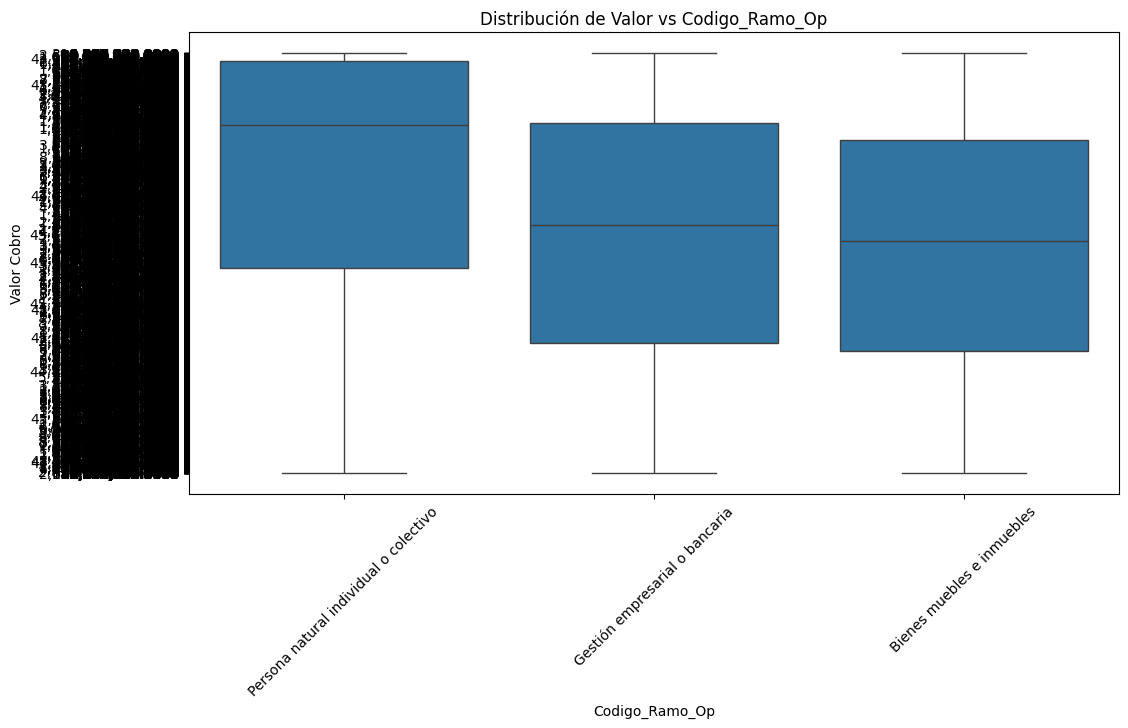

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Codigo_Ramo_Op', y='Valor_Cobro', data=df)
plt.title('Distribución de Valor vs Codigo_Ramo_Op')
plt.ylabel('Valor Cobro')
plt.xlabel('Codigo_Ramo_Op')
plt.xticks(rotation=45)
plt.show()

#### ***8. Columna Desc_Causa_Estado***

Para la columna "Desc_Causa_Estado" agrupamos las categorías de la siguiente manera.


Renovación = "Renovado", "Prorroga"

Nuevo/Rehabilitación = "Nuevo", "Rehabilitacion"

Error = "POR ERROR EN EXPEDICION", "Por error de tramite", "Convertido", "Sin informacion"

Cancelación = Todas las demás (NOTA: La gran mayoría de categorías dentro de esta columna se agrupan en cancelación)

Estado inicial de las categorías

In [103]:
df['Desc_Causa_Estado'] = df['Desc_Causa_Estado'].replace({
    'Renovado': 'Renovación',
    'Prorroga': 'Renovación',
    'Nuevo': 'Nuevo/Rehabilitación',
    'Rehabilitacion': 'Nuevo/Rehabilitación',
    'POR ERROR EN EXPEDICION': 'Error',
    'Por error de tramite': 'Error',
    'Convertido': 'Error',
    'sin informacion': 'Error',
})

mask = ~df['Desc_Causa_Estado'].isin(['Renovación', 'Nuevo/Rehabilitación', 'Error'])
df.loc[mask, 'Desc_Causa_Estado'] = 'Cancelación'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Despues de la agrupación, las categorías quedan distribuidas de la siguiente manera.

In [104]:
df['Desc_Causa_Estado'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Desc_Causa_Estado
Renovación              18737
Cancelación             14052
Error                    2125
Nuevo/Rehabilitación     1184
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


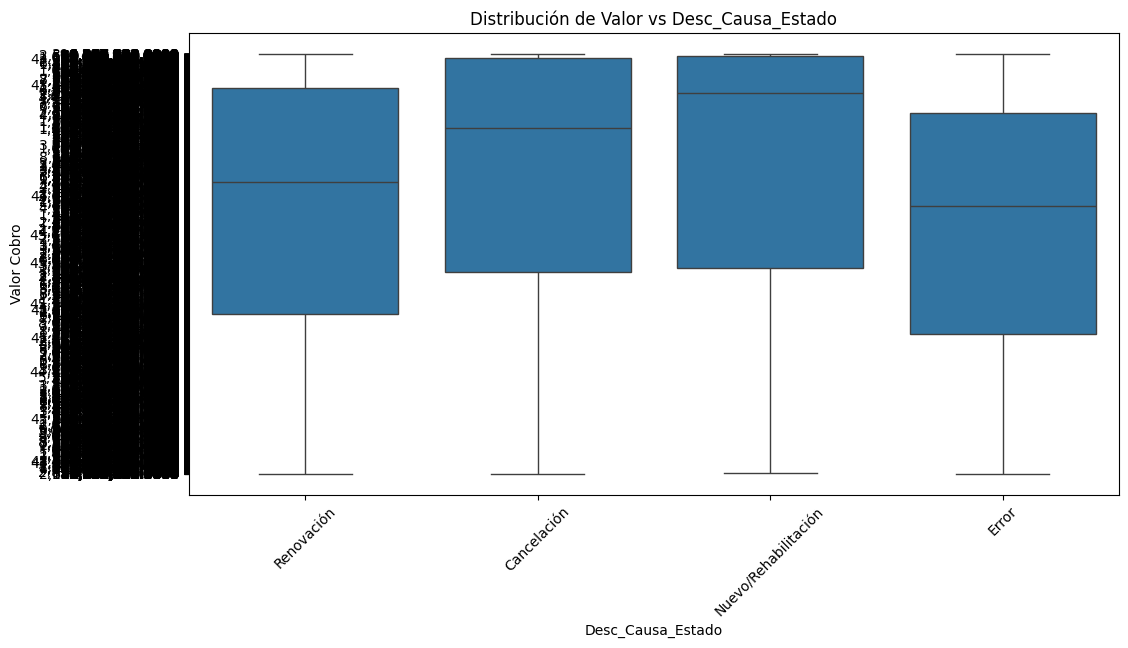

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Desc_Causa_Estado', y='Valor_Cobro', data=df)
plt.title('Distribución de Valor vs Desc_Causa_Estado')
plt.ylabel('Valor Cobro')
plt.xlabel('Desc_Causa_Estado')
plt.xticks(rotation=45)
plt.show()

#### ***9. Columna Estado_Contrato_Desc***

In [105]:
df['Estado_Contrato_Desc'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Estado_Contrato_Desc
Vigente        19925
Cancelado      14300
No renovado     1871
Caducado           2
Name: count, dtype: int64

Para reducir su dimencionalidad simplemente se pasa el estado "no renovado" y "caducado" a "cancelado" debido a que son similares

In [78]:
df['Estado_Contrato_Desc'] = df['Estado_Contrato_Desc'].replace({
    'No renovado': 'Cancelado',
    'Caducado': 'Cancelado',
})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


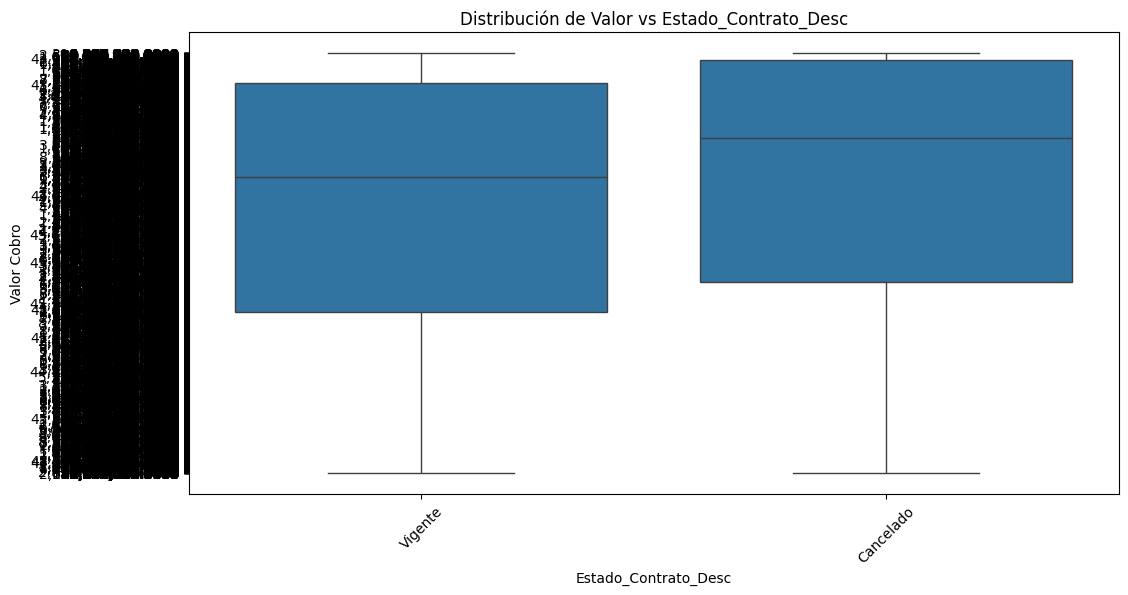

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Estado_Contrato_Desc', y='Valor_Cobro', data=df)
plt.title('Distribución de Valor vs Estado_Contrato_Desc')
plt.ylabel('Valor Cobro')
plt.xlabel('Estado_Contrato_Desc')
plt.xticks(rotation=45)
plt.show()

#### ***10. Columna Nombre_Regional***

In [106]:
df['Nombre_Regional'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nombre_Regional
REGIONAL ANTIOQUIA       10913
sin informacion           4934
REGIONAL CENTRO           4647
REGIONAL PANAMÃ           3766
REGIONAL NORTE            3759
OFICINA CENTRAL           3454
REGIONAL OCCIDENTE        3007
REGIONAL EJE CAFETERO     1618
Name: count, dtype: int64

Dada la importancia de esta distribución y la dificultad para agrupar regiones que claramente ya fueron agrupadas, se decide dejar tal cual está, además como ejercicio inicial nos permitiremos dejar la categoría “sin información”

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


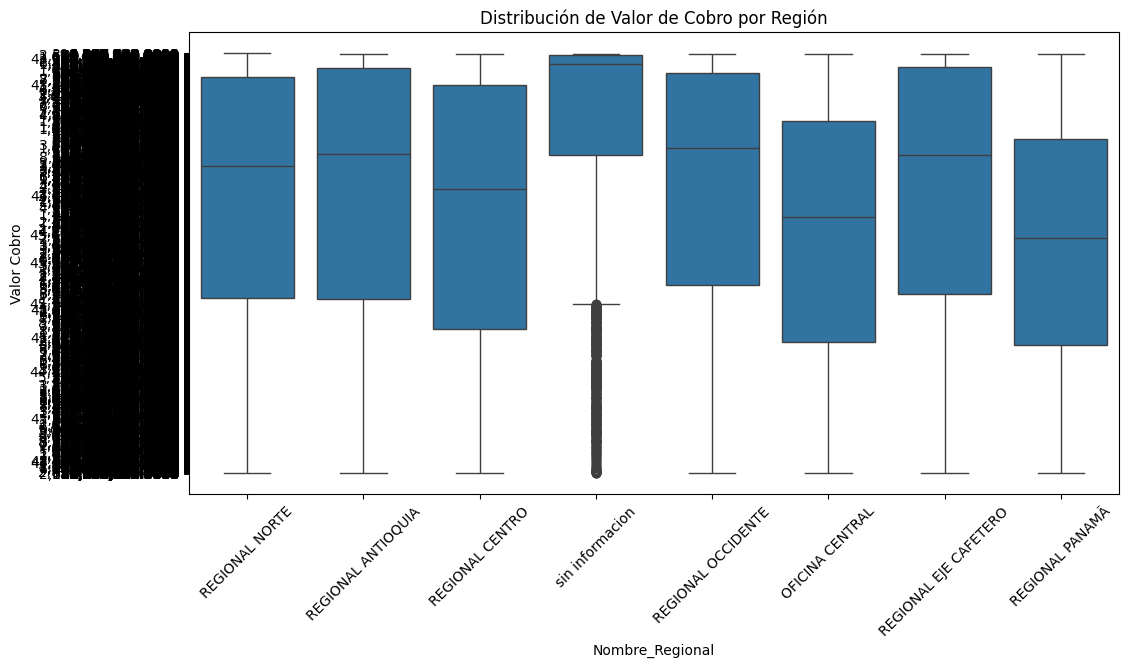

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Nombre_Regional', y='Valor_Cobro', data=df)
plt.title('Distribución de Valor de Cobro por Región')
plt.ylabel('Valor Cobro')
plt.xlabel('Nombre_Regional')
plt.xticks(rotation=45)
plt.show()

#### ***11. Escalar variables númericas ***

In [107]:
df['Valor_Cobro'] = df['Valor_Cobro'].str.replace(",", "").astype(float)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
#Lista de variables numéricas

numCols=df.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

df[numCols].head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Valor_Cobro
0,396266766.0000
1,57429.0000


In [109]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### ***11. Tratamiento categoricas ***

In [110]:
#Lista de variables categóricas
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(df[col].value_counts())
    print()

===== Codigo_Ramo_Op ====================
Codigo_Ramo_Op
Persona natural individual o colectivo    25519
Bienes muebles e inmuebles                 7691
Gestión empresarial o bancaria             2888
Name: count, dtype: int64

===== Estado_Contrato_Desc ====================
Estado_Contrato_Desc
Vigente        19925
Cancelado      14300
No renovado     1871
Caducado           2
Name: count, dtype: int64

===== Nombre_Regional ====================
Nombre_Regional
REGIONAL ANTIOQUIA       10913
sin informacion           4934
REGIONAL CENTRO           4647
REGIONAL PANAMÃ           3766
REGIONAL NORTE            3759
OFICINA CENTRAL           3454
REGIONAL OCCIDENTE        3007
REGIONAL EJE CAFETERO     1618
Name: count, dtype: int64

===== Desc_Causa_Estado ====================
Desc_Causa_Estado
Renovación              18737
Cancelación             14052
Error                    2125
Nuevo/Rehabilitación     1184
Name: count, dtype: int64

===== Desc_Operacion_Pago ====================
D

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
# Aplicación de la función de usuario Dummies: one-hot encoding
df =pd.get_dummies(df, drop_first=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36098 entries, 0 to 36097
Data columns (total 20 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Valor_Cobro                                                                      36098 non-null  float64
 1   Codigo_Ramo_Op_Gestión empresarial o bancaria                                    36098 non-null  bool   
 2   Codigo_Ramo_Op_Persona natural individual o colectivo                            36098 non-null  bool   
 3   Estado_Contrato_Desc_Cancelado                                                   36098 non-null  bool   
 4   Estado_Contrato_Desc_No renovado                                                 36098 non-null  bool   
 5   Estado_Contrato_Desc_Vigente                                                     36098 non-null  bool   
 6   Nombre

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
